In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

## Load per game and advanced data and merge them

In [2]:
per_game = pd.read_csv(Path('../data/per_game_data.csv'))
per_game.shape

(8295, 31)

In [3]:
advanced = pd.read_csv(Path('../data/advanced_data.csv'))
advanced.shape

(8295, 30)

MP feature in advanced data is season total not per game, so it will be dropped

In [4]:
advanced.drop(columns=['MP'], inplace=True)

Merge per game data and advanced data

In [5]:
data = per_game.merge(advanced, on=['Player', 'Pos', 'Age', 'Tm', 'G', 'season', 'all_nba_1st_team'])
data.shape

(8295, 53)

Remove columns that were created while scraping the web that have only NaN values

In [6]:
data.dropna(axis=1, how='all', inplace=True)
data.shape

(8295, 51)

In [7]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season',
       'all_nba_1st_team', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

## Get insights and filter data

Filter unwanted features out

In [8]:
data.drop(columns=['Player', 'Pos', 'Age', 'Tm', 'season'], inplace=True)

GS feature wasn't tracked in early 1980's so it will also be dropped

In [9]:
data.drop(columns=['GS'], inplace=True)

In [10]:
data.shape

(8295, 45)

In [11]:
data.columns

Index(['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'all_nba_1st_team', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

Filter out players with not enough games or minutes played. First, let's see the difference in minutes and games played between all nba 1st team players and others

In [12]:
data_first_team = data[data['all_nba_1st_team'] == 1][['MP', 'G']]
data_others = data[data['all_nba_1st_team'] == 0][['MP', 'G']]

In [13]:
data_first_team.describe()

,MP,G
count,40.000000,40.000000
mean,36.402500,75.400000
std,2.665688,8.508819
min,30.100000,46.000000
25%,35.150000,73.750000
50%,36.800000,79.000000
75%,37.850000,81.000000
max,42.000000,82.000000


In [14]:
data_others.describe()

,MP,G
count,8255.000000,8255.000000
mean,18.592392,48.780497
std,9.929446,26.707867
min,0.000000,1.000000
25%,10.400000,25.000000
50%,17.400000,53.000000
75%,26.500000,74.000000
max,44.500000,85.000000


Based on those values, we will only take players that played more than 40 games and more than 25 minutes per game

In [15]:
data = data[data.G > 40]
data = data[data.MP > 25]

data.shape

(2121, 45)

In the end, shooting percentages will be deleted because they are calculated as ((number of makes) / (number of attempts)). Also, some of them contain NaN values.

In [16]:
data.drop(columns=['FG%', '2P%', '3P%', 'FT%'], inplace=True)

In [17]:
X = data.drop(columns=['all_nba_1st_team'])
y = data['all_nba_1st_team']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 8287
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       2121 non-null   int64  
 1   MP      2121 non-null   float64
 2   FG      2121 non-null   float64
 3   FGA     2121 non-null   float64
 4   3P      2121 non-null   float64
 5   3PA     2121 non-null   float64
 6   2P      2121 non-null   float64
 7   2PA     2121 non-null   float64
 8   eFG%    2121 non-null   float64
 9   FT      2121 non-null   float64
 10  FTA     2121 non-null   float64
 11  ORB     2121 non-null   float64
 12  DRB     2121 non-null   float64
 13  TRB     2121 non-null   float64
 14  AST     2121 non-null   float64
 15  STL     2121 non-null   float64
 16  BLK     2121 non-null   float64
 17  TOV     2121 non-null   float64
 18  PF      2121 non-null   float64
 19  PTS     2121 non-null   float64
 20  PER     2121 non-null   float64
 21  TS%     2121 non-null   float64
 22  

In [19]:
X.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,...,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,72.366808,31.671523,5.594342,11.302122,0.258793,0.769165,5.332815,10.532107,0.507577,2.977982,...,13.463461,20.574587,3.186563,2.981424,6.166054,0.125734,0.522489,0.260019,0.779066,1.712871
std,10.906174,4.022537,1.867853,3.689538,0.538192,1.458677,1.905622,3.659720,0.044459,1.475760,...,3.284651,4.938878,2.394915,1.346794,3.151136,0.050765,2.021696,1.211449,2.537659,1.718844
min,41.000000,25.100000,1.200000,2.300000,0.000000,0.000000,0.700000,1.600000,0.373000,0.200000,...,5.200000,5.600000,-2.700000,-0.500000,-1.500000,-0.039000,-5.300000,-3.500000,-6.000000,-2.600000
25%,67.000000,28.200000,4.200000,8.600000,0.000000,0.000000,4.000000,7.800000,0.478000,1.900000,...,11.300000,17.100000,1.600000,2.000000,4.000000,0.091000,-0.800000,-0.600000,-0.900000,0.600000
50%,77.000000,31.500000,5.300000,10.900000,0.000000,0.100000,5.100000,10.200000,0.504000,2.700000,...,13.200000,20.500000,2.900000,2.800000,5.700000,0.122000,0.300000,0.200000,0.500000,1.400000
75%,81.000000,34.800000,6.800000,13.700000,0.100000,0.500000,6.600000,13.000000,0.532000,3.700000,...,15.300000,23.900000,4.400000,3.700000,7.900000,0.157000,1.600000,1.000000,2.200000,2.500000
max,85.000000,43.100000,12.100000,23.400000,2.800000,8.000000,12.100000,23.000000,0.714000,9.300000,...,29.100000,37.500000,14.600000,9.100000,20.000000,0.322000,9.300000,4.700000,11.900000,11.400000


## Correlations

Correlation between features and target value

In [20]:
corrcoefs = []
for feature in X.columns:
    corrcoef = np.corrcoef(X[feature].values, y)[0, 1]
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)

G 0.03856770699553157
MP 0.16309745644954804
FG 0.24430730283655688
FGA 0.18568833002300494
3P -0.050578305357490506
3PA -0.050782393257038844
2P 0.25394865282113366
2PA 0.20718985902468012
eFG% 0.1409018881160049
FT 0.2510844822390895
FTA 0.3150027010958012
ORB 0.14321775434652678
DRB 0.20365223372349955
TRB 0.20689860444933705
AST 0.08398926389487447
STL 0.1085266316963769
BLK 0.2522537293330294
TOV 0.18924421876640257
PF 0.03982479686627616
PTS 0.2529194662900637
PER 0.29504738544525316
TS% 0.12936712294781963
3PAr -0.056480582663346796
FTr 0.1944225696206518
ORB% 0.0817130258180445
DRB% 0.12016037902127553
TRB% 0.13232034829561296
AST% 0.07851474979152086
STL% 0.050593280585955316
BLK% 0.18549275072033228
TOV% -0.018722428486972198
USG% 0.19171495106333641
OWS 0.22877386875671896
DWS 0.24671522177503277
WS 0.2794028650381951
WS/48 0.2500618213289933
OBPM 0.22978768959958612
DBPM 0.17027180808435666
BPM 0.2645405413108715
VORP 0.29122086658163876


Correlation between features

In [21]:
X.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
G,1.000000,0.088742,0.036944,-0.007838,-0.066970,-0.073400,0.055088,0.021339,0.129536,0.024921,...,0.033617,-0.092239,0.283106,0.404667,0.388127,0.121051,0.041154,0.071885,0.067236,0.201736
MP,0.088742,1.000000,0.679614,0.674901,0.050186,0.065528,0.652107,0.654909,0.033883,0.591613,...,-0.130750,0.413535,0.486066,0.438207,0.556759,0.345667,0.525634,0.103964,0.469188,0.562295
FG,0.036944,0.679614,1.000000,0.959579,0.072799,0.087122,0.959489,0.933374,0.159583,0.730887,...,-0.339554,0.872350,0.547669,0.293219,0.541456,0.427200,0.709375,-0.022246,0.555094,0.606633
FGA,-0.007838,0.674901,0.959579,1.000000,0.199275,0.219745,0.884338,0.921461,-0.070491,0.693582,...,-0.398707,0.906467,0.405983,0.227777,0.405891,0.275468,0.628463,-0.082634,0.461783,0.515088
3P,-0.066970,0.050186,0.072799,0.199275,1.000000,0.992576,-0.210561,-0.194195,0.060505,-0.055716,...,-0.338712,0.159797,0.043570,-0.122496,-0.019032,-0.015095,0.249837,-0.078174,0.161354,0.134526
3PA,-0.073400,0.065528,0.087122,0.219745,0.992576,1.000000,-0.194778,-0.176282,0.034492,-0.042817,...,-0.337927,0.179081,0.033231,-0.120607,-0.026156,-0.027160,0.250614,-0.076533,0.162805,0.137500
2P,0.055088,0.652107,0.959489,0.884338,-0.210561,-0.194778,1.000000,0.969720,0.139257,0.732267,...,-0.237357,0.809891,0.524499,0.321995,0.536084,0.422890,0.624648,0.000262,0.498431,0.556594
2PA,0.021339,0.654909,0.933374,0.921461,-0.194195,-0.176282,0.969720,1.000000,-0.085469,0.716684,...,-0.267989,0.843260,0.396083,0.277847,0.419715,0.288407,0.534133,-0.052671,0.401073,0.464942
eFG%,0.129536,0.033883,0.159583,-0.070491,0.060505,0.034492,0.139257,-0.085469,1.000000,0.081108,...,0.059323,-0.068489,0.524029,0.165664,0.469041,0.548619,0.416427,0.156026,0.406260,0.372607
FT,0.024921,0.591613,0.730887,0.693582,-0.055716,-0.042817,0.732267,0.716684,0.081108,1.000000,...,-0.097273,0.709893,0.613934,0.284043,0.587837,0.515315,0.651887,0.017127,0.527889,0.572864


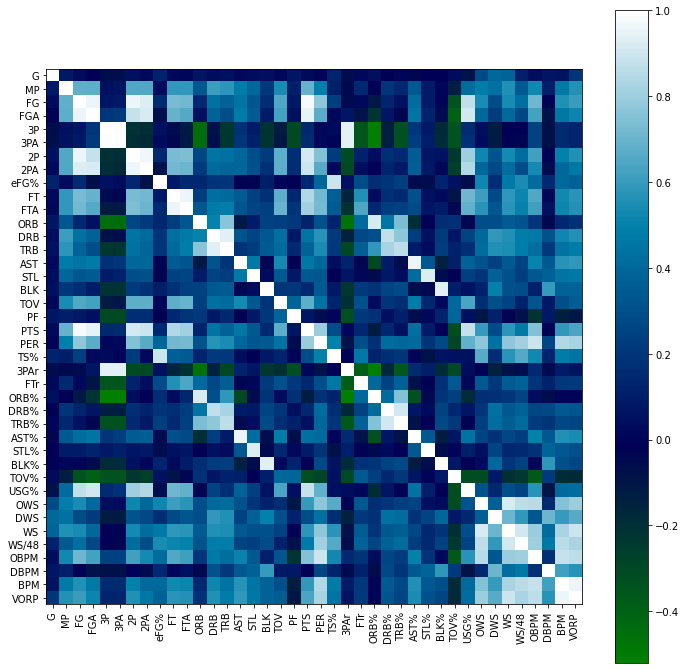

In [22]:
feature_names = X.columns
number_of_features = len(feature_names)

plt.figure(figsize = (12, 12))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

In [23]:
X[['TS%', 'eFG%']].corr()

,TS%,eFG%
TS%,1.000000,0.898475
eFG%,0.898475,1.000000


In [24]:
data.drop(columns=['eFG%'], inplace=True)

In [25]:
X[['PER', 'WS', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].corr()

,PER,WS,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
PER,1.000000,0.777204,0.775194,0.439976,0.810861,0.895965,0.268482,0.842571,0.824133
WS,0.777204,1.000000,0.917706,0.707640,0.910613,0.792416,0.413477,0.828823,0.894723
OWS,0.775194,0.917706,1.000000,0.369098,0.865695,0.856284,0.148214,0.753080,0.803689
DWS,0.439976,0.707640,0.369098,1.000000,0.591113,0.331187,0.703820,0.599902,0.664183
WS/48,0.810861,0.910613,0.865695,0.591113,1.000000,0.806615,0.459967,0.862080,0.830755
OBPM,0.895965,0.792416,0.856284,0.331187,0.806615,1.000000,0.180537,0.882947,0.866937
DBPM,0.268482,0.413477,0.148214,0.703820,0.459967,0.180537,1.000000,0.620782,0.572361
BPM,0.842571,0.828823,0.753080,0.599902,0.862080,0.882947,0.620782,1.000000,0.964138
VORP,0.824133,0.894723,0.803689,0.664183,0.830755,0.866937,0.572361,0.964138,1.000000


These stats are mostly highly correlated. BPM is calculated as OBPM + DBPM and WS is calculated as OWS + DWS. Models will be created with and without some of these features.

In [26]:
# X.drop(columns=['WS/48', 'DWS', 'DBPM'], inplace=True)

In [27]:
X.shape

(2121, 40)

In [28]:
np.bincount(y)

array([2081,   40])

In [29]:
# combine them once more
data['all_nba_1st_team'] = y

## Visualisation

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
per_poss = pd.read_csv(Path('../data/per_100_data.csv'))
advanced = pd.read_csv(Path('../data/advanced_data.csv'))
per_game = pd.read_csv(Path('../data/per_game_data.csv'))

per_game.shape, advanced.shape, per_poss.shape

((8295, 31), (8295, 30), (8295, 33))

In [32]:
per_poss.dropna(axis=1, how='all', inplace=True)
per_game.dropna(axis=1, how='all', inplace=True)
advanced.dropna(axis=1, how='all', inplace=True)

per_game.shape, advanced.shape, per_poss.shape

((8295, 31), (8295, 28), (8295, 32))

In [33]:
advanced['MP'] = np.round(advanced['MP'] / advanced['G'], 1)
per_poss['MP'] = np.round(per_poss['MP'] / per_poss['G'], 1)

In [34]:
per_game = per_game[per_game.G > 40]
per_game = per_game[per_game.MP > 25]

advanced = advanced[advanced.G > 40]
advanced = advanced[advanced.MP > 25]

per_poss = per_poss[per_poss.G > 40]
per_poss = per_poss[per_poss.MP > 25]

In [35]:
def plot_distplot_trad_stat(stat):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(per_poss[per_poss['all_nba_1st_team'] == 1][stat])
    sns.distplot(per_poss[per_poss['all_nba_1st_team'] == 0][stat])

    plt.title(stat + ' per poss')
    plt.legend(labels=['All NBA 1st team', 'others'])
    
    plt.subplot(1, 2, 2)
    sns.distplot(per_game[per_game['all_nba_1st_team'] == 1][stat])
    sns.distplot(per_game[per_game['all_nba_1st_team'] == 0][stat])

    plt.title(stat + ' per game')
    plt.legend(labels=['All NBA 1st team', 'others'])
    
    plt.show()
    
    
def plot_distplot_advanced(stat):
    sns.distplot(advanced[advanced['all_nba_1st_team'] == 1][stat])
    sns.distplot(advanced[advanced['all_nba_1st_team'] == 0][stat])

    plt.title('Displot for ' + stat)
    plt.legend(labels=['All NBA 1st team', 'others'])

    plt.show()    

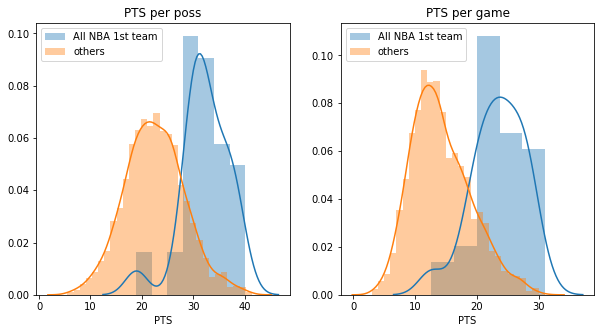

In [36]:
plot_distplot_trad_stat('PTS')

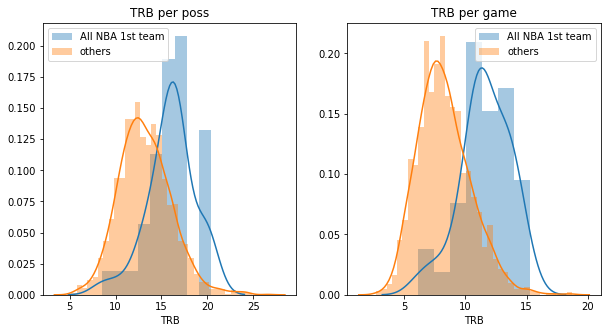

In [37]:
plot_distplot_trad_stat('TRB')

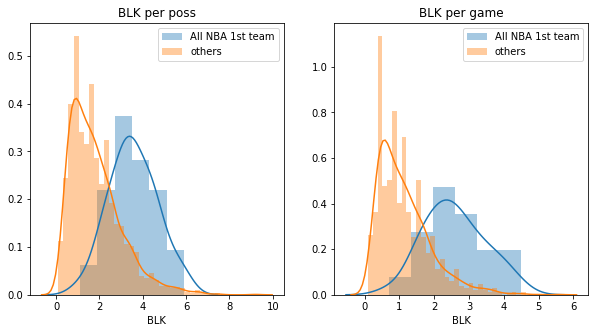

In [38]:
plot_distplot_trad_stat('BLK')

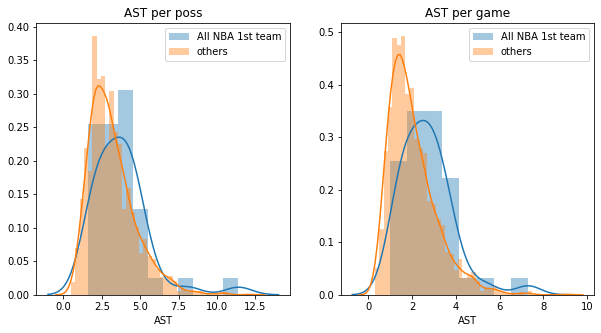

In [39]:
plot_distplot_trad_stat('AST')

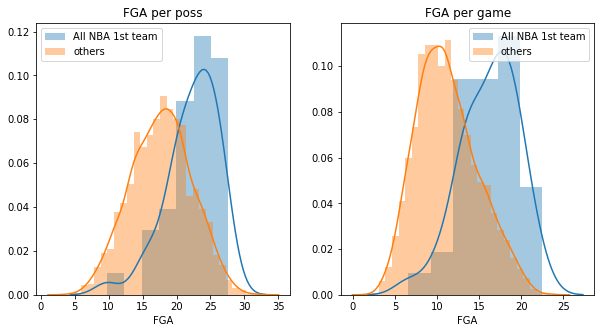

In [40]:
plot_distplot_trad_stat('FGA')

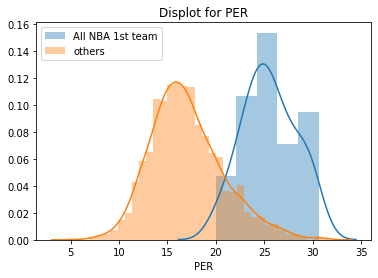

In [41]:
plot_distplot_advanced('PER')

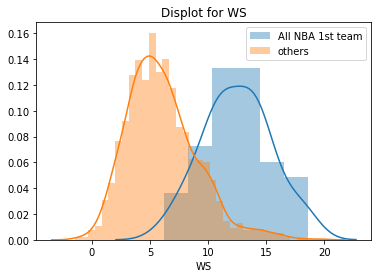

In [42]:
plot_distplot_advanced('WS')

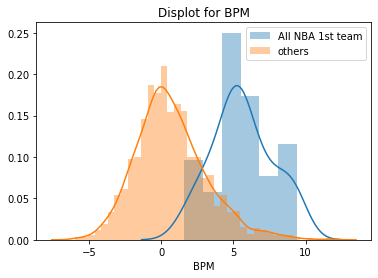

In [43]:
plot_distplot_advanced('BPM')

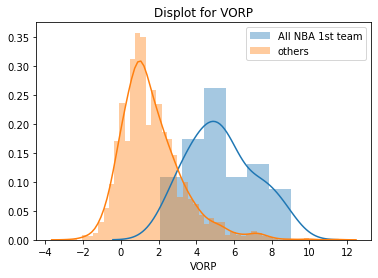

In [44]:
plot_distplot_advanced('VORP')

In [45]:
def plot_swarmplot_trad_stat(stat):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.swarmplot(x='all_nba_1st_team', y=stat, data=per_poss)

    plt.title(stat + ' per poss')
    plt.legend(labels=['others', 'All NBA 1st team'])
    
    plt.subplot(1, 2, 2)
    sns.swarmplot(x='all_nba_1st_team', y=stat, data=per_game)

    plt.title(stat + ' per game')
    plt.legend(labels=['others', 'All NBA 1st team'])
    
    plt.show()


def plot_swarmplot_advanced(stat):
    plt.figure(figsize=(6, 6))

    sns.swarmplot(x='all_nba_1st_team', y=stat, data=advanced)

    plt.title('Swarmplot for ' + stat)
    plt.show()

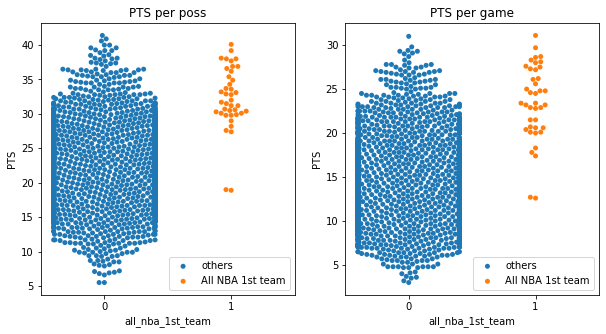

In [46]:
plot_swarmplot_trad_stat('PTS')

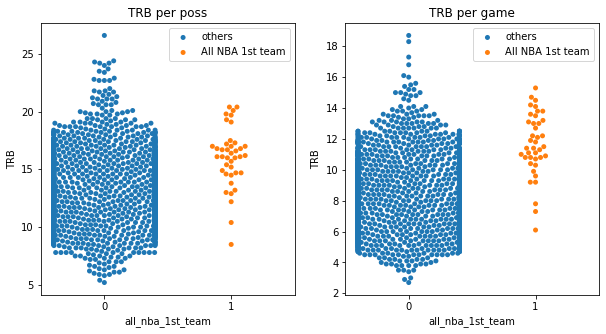

In [47]:
plot_swarmplot_trad_stat('TRB')

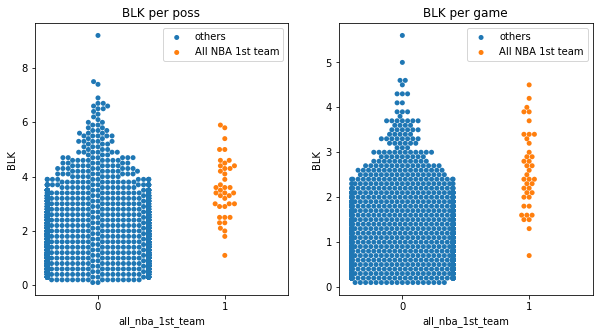

In [48]:
plot_swarmplot_trad_stat('BLK')

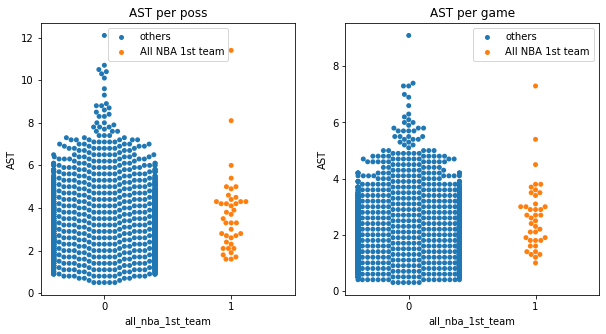

In [49]:
plot_swarmplot_trad_stat('AST')

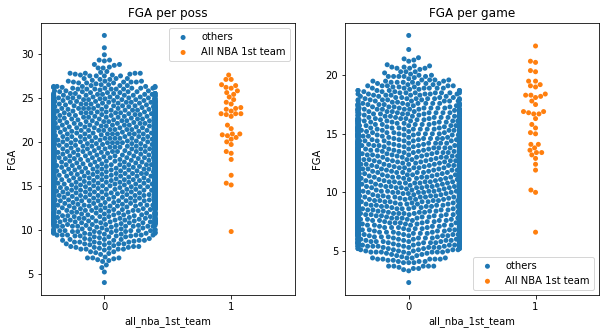

In [50]:
plot_swarmplot_trad_stat('FGA')

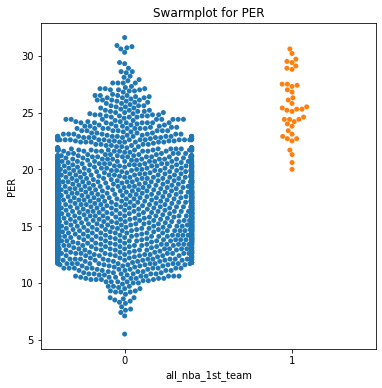

In [51]:
plot_swarmplot_advanced('PER')

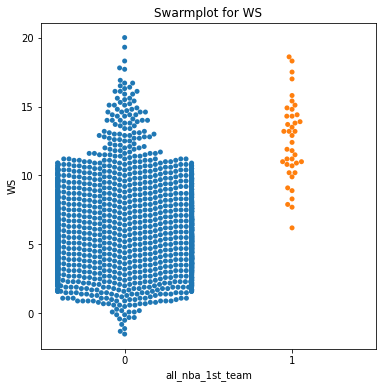

In [52]:
plot_swarmplot_advanced('WS')

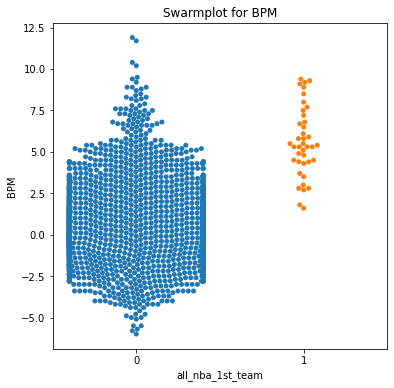

In [53]:
plot_swarmplot_advanced('BPM')

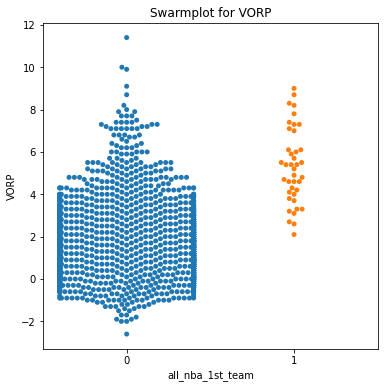

In [54]:
plot_swarmplot_advanced('VORP')

In [55]:
def plot_boxplot_trad_stat(stat):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='all_nba_1st_team', y=stat, data=per_poss)

    plt.title(stat + ' per poss')
    plt.legend(labels=['others', 'All NBA 1st team'])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='all_nba_1st_team', y=stat, data=per_game)

    plt.title(stat + ' per game')
    plt.legend(labels=['others', 'All NBA 1st team'])
    
    plt.show()


def plot_boxplot_advanced(stat):
    plt.figure(figsize=(6, 6))

    sns.boxplot(x='all_nba_1st_team', y=stat, data=advanced)

    plt.title('Boxplot for ' + stat)
    plt.show()

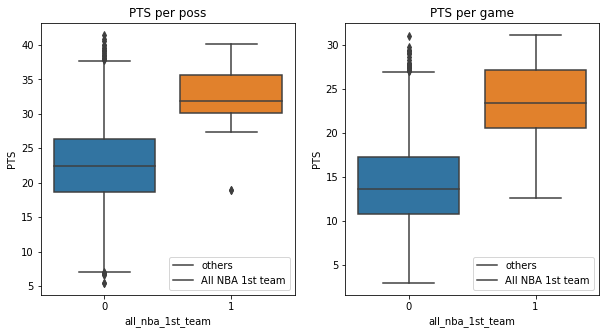

In [56]:
plot_boxplot_trad_stat('PTS')

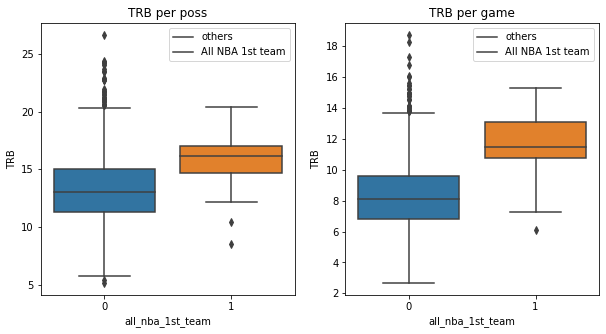

In [57]:
plot_boxplot_trad_stat('TRB')

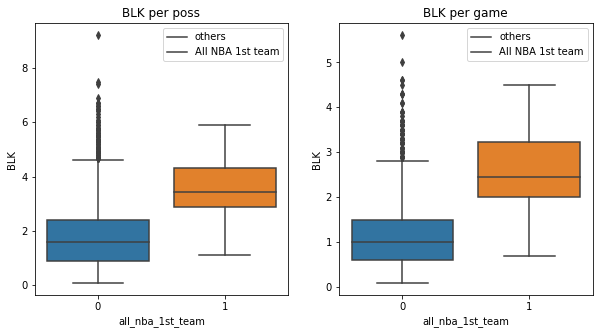

In [58]:
plot_boxplot_trad_stat('BLK')

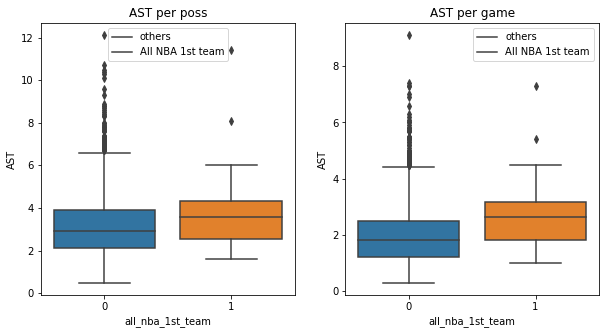

In [59]:
plot_boxplot_trad_stat('AST')

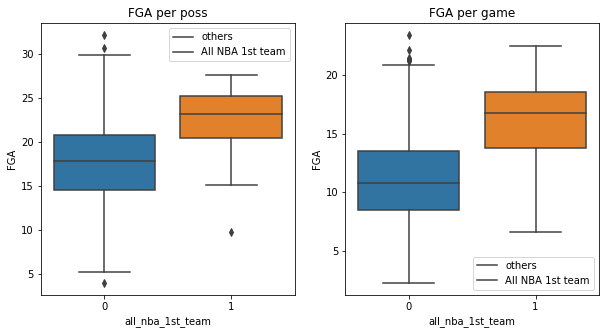

In [60]:
plot_boxplot_trad_stat('FGA')

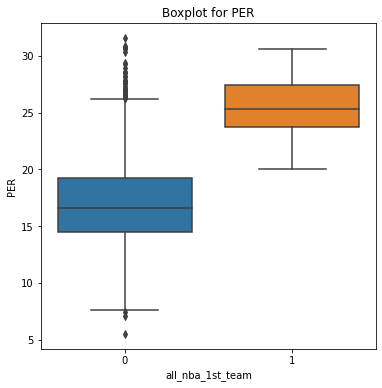

In [61]:
plot_boxplot_advanced('PER')

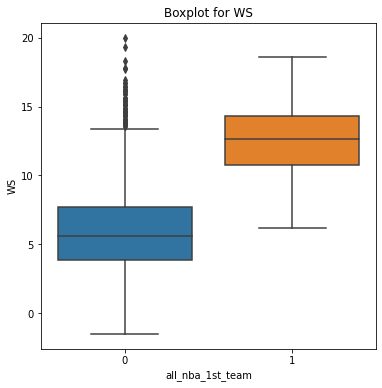

In [62]:
plot_boxplot_advanced('WS')

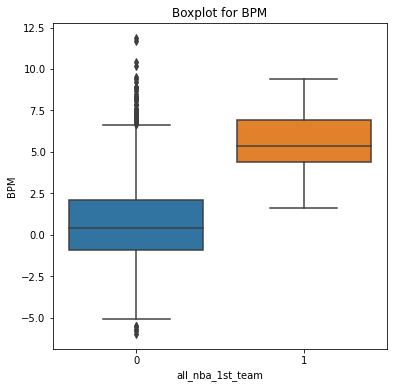

In [63]:
plot_boxplot_advanced('BPM')

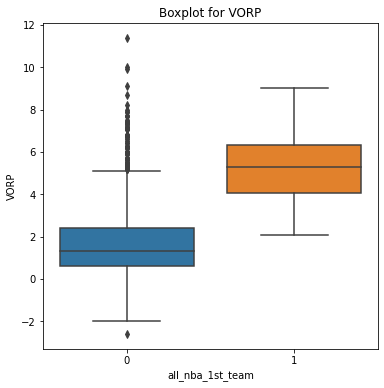

In [64]:
plot_boxplot_advanced('VORP')

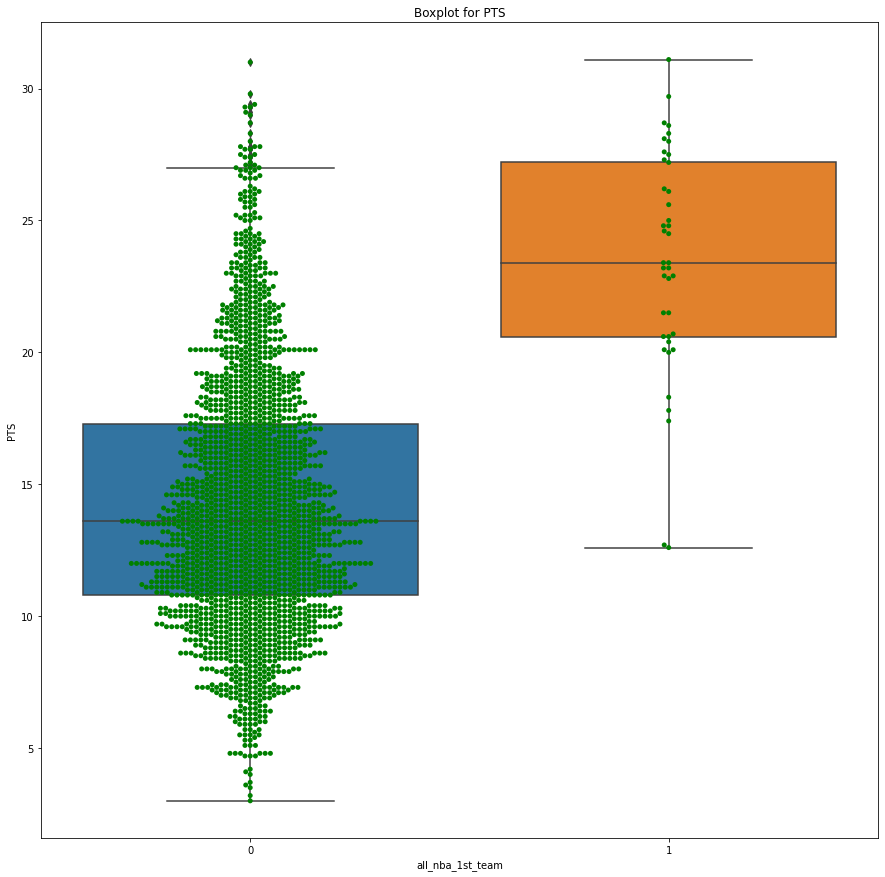

In [65]:
def plot_plot(stat):
    plt.figure(figsize=(15, 15))

    sns.boxplot(x='all_nba_1st_team', y=stat, data=data)
    sns.swarmplot(x='all_nba_1st_team', y=stat, data=data, color='green')

    plt.title('Boxplot for ' + stat)
    plt.show()

plot_plot('PTS')